In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from utils.udp_util import extract_udp_prague_to_dataframe
from utils.plotter import  plot_siftr_graph

In [2]:
# File paths

file_cubic = '../data/net_2025-06-04-07-59-36/iperf3_client_cubic_iperf3_d120.json'
file_prague = '../data/net_2025-06-04-07-59-36/iperf3_client_prague_iperf3_d120.json'



In [3]:
import json
import numpy as np
import pandas as pd

def extract_data_df(filename):
    with open(filename) as f:
        data = json.load(f)

    records = []

    for interval in data['intervals']:
        record = {
            'time': interval['sum']['start'],
            'bitrate_mbps': interval['sum']['bits_per_second'] / 1_000_000
        }

        stream = interval['streams'][0]
        if 'rtt' in stream:
            record['rtt_time'] = stream['start']
            record['rtt_ms'] = stream['rtt'] / 1000.0  # µs to ms
        else:
            record['rtt_time'] = None
            record['rtt_ms'] = None

        records.append(record)

    df = pd.DataFrame(records)
    return df


In [4]:



# Function to extract data from iperf3 JSON
def extract_data(filename):
    with open(filename) as f:
        data = json.load(f)

    times = []
    bitrates = []
    rtt_times = []
    rtts = []

    for interval in data['intervals']:
        times.append(interval['sum']['start'])
        bitrates.append(interval['sum']['bits_per_second'] / 1_000_000)  # Convert to Mbit/s

        stream = interval['streams'][0]
        if 'rtt' in stream:
            rtt_times.append(stream['start'])
            rtts.append(stream['rtt'] / 1000.0)  # µs to ms

    return np.array(times), np.array(bitrates), np.array(rtt_times), np.array(rtts)





import os
os.path.exists(file_prague)

# Extract data
t_prague, b_prague, rt_prague, rtt_prague = extract_data(file_prague)

In [5]:



# Function to extract data from iperf3 JSON
def extract_data(filename):
    with open(filename) as f:
        data = json.load(f)

    times = []
    bitrates = []
    rtt_times = []
    rtts = []

    for interval in data['intervals']:
        times.append(interval['sum']['start'])
        bitrates.append(interval['sum']['bits_per_second'] / 1_000_000)  # Convert to Mbit/s

        stream = interval['streams'][0]
        if 'rtt' in stream:
            rtt_times.append(stream['start'])
            rtts.append(stream['rtt'] / 1000.0)  # µs to ms

    return np.array(times), np.array(bitrates), np.array(rtt_times), np.array(rtts)





import os
os.path.exists(file_cubic)

# Extract data
t_cubic, b_cubic, rt_cubic, rtt_cubic = extract_data(file_cubic)

In [6]:
tfcubic = extract_data_df(file_cubic)

In [7]:
tfcubic.describe()

,time,bitrate_mbps,rtt_time,rtt_ms
count,120.000000,120.000000,120.000000,120.000000
mean,59.500114,115.155299,59.500114,15.291875
std,34.785057,27.860944,34.785057,7.754447
min,0.000000,36.505991,0.000000,2.871000
25%,29.750088,94.873124,29.750088,12.040500
50%,59.500109,110.245424,59.500109,15.239500
75%,89.250138,130.977489,89.250138,17.226500
max,119.000089,228.314026,119.000089,87.420000


In [8]:
tfprague = extract_data_df(file_prague)

In [9]:
tfprague.describe()

,time,bitrate_mbps,rtt_time,rtt_ms
count,120.000000,120.000000,120.000000,120.000000
mean,59.500205,118.029434,59.500205,19.256267
std,34.785049,34.540361,34.785049,48.646880
min,0.000000,31.434710,0.000000,3.662000
25%,29.750173,94.373207,29.750173,12.559750
50%,59.500099,125.828498,59.500099,14.744500
75%,89.250188,138.502912,89.250188,17.850000
max,119.000161,220.207129,119.000161,545.978000


In [10]:
tfcubic.rename(columns={'rtt_ms': 'SmoothedRTT'}, inplace=True)
tfcubic.rename(columns={'time': 'Time'}, inplace=True)

tfprague.rename(columns={'rtt_ms': 'SmoothedRTT'}, inplace=True)
tfprague.rename(columns={'time': 'Time'}, inplace=True)

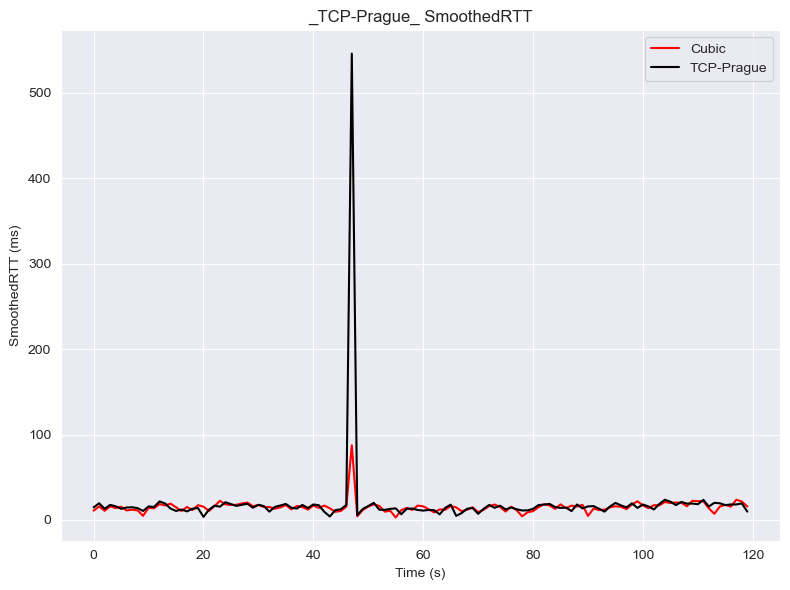

In [11]:
    # Define paths
paths = {
    "Cubic": tfcubic,
    "TCP-Prague": tfprague
}



scenario = str("_" + "TCP-Prague" + "_")

plot_siftr_graph(paths=paths,
                ycolumn="SmoothedRTT",
                title=f"{scenario} SmoothedRTT",
                xlabel="Time (s)",
                ylabel="SmoothedRTT (ms)",
                filename=f'{scenario}_SmoothedRTT',
                graph_directory="./",
)